gets name, focuscode and frequency range of all observatories of a specific day

In [ ]:
import stations
import const
import datetime

In [ ]:
from astropy.io import fits
import urllib
from bs4 import BeautifulSoup
import datetime

frq_limit_low = 50
frq_limit_high = 500

def listFilesDay(url):
    page = urllib.request.urlopen(url).read()
    soup = BeautifulSoup(page, 'html.parser')
    return [node.get('href') for node in soup.find_all('a') if node.get('href').endswith('.fit.gz')]

# mydate = "/2022/01/26"
mydate = "{:%Y/%m/%d}".format(datetime.date.today())
url = 'http://soleil.i4ds.ch/solarradio/data/2002-20yy_Callisto/'
files = listFilesDay(url+mydate)

stations = []
for i in files:
    parts = i.rsplit("_")
    stations.append([parts[0], parts[3][:2]])
stations_clean = []
for i in stations:
    if i not in stations_clean:
        stations_clean.append(i)

def listFD(url, station):
    print(station)
    page = urllib.request.urlopen(url).read()
    soup = BeautifulSoup(page, 'html.parser')

    return [url + '/' + node.get('href') for node in soup.find_all('a') if node.get('href').startswith(station[0]) and node.get('href').endswith(station[1] + '.fit.gz')]

for i in stations_clean:
    for a, b in enumerate(listFD(url + mydate, i)):

        with fits.open(b) as fds:
            """
            try except -> print(fds[0].header["CDELT2"])
                          print(fds[0].header["CRVAL2"] - fds[0].header["CDELT2"] * fds[0].header["CRPIX2"])
            if fds[1] exists
            """
            lat = fds[0].header['OBS_LAT']
            lac = fds[0].header['OBS_LAC']
            if lac =='S':
                lat = -lat
            lon = fds[0].header['OBS_LON']
            loc = fds[0].header['OBS_LOC']
            if loc=='W':
                lon = -lon
            frq_axis = fds[1].data['frequency'].flatten()
            frq = sorted([frq_axis[0], frq_axis[-1]])
            if frq[0]<frq_limit_low and frq[1]<frq_limit_high:
                print(i[0],i[1], lon, lat, frq)
            else:
                print("discard: ---------------- ", i[0],i[1], lon, lat, frq)
            break


TODO: what frequency ranges are allowed to correlate 

TODO: rewrite observatories -> focus code part of class

TODO: write/load observatories to/from file

In [ ]:
import datetime 
import stations
import download
today = datetime.datetime.today()
stats = stations.getStations(today)
download.downloadFullDay(today, stats)

In [ ]:
import data
import datetime 
%load_ext autoreload
%autoreload 2

In [ ]:
date = datetime.datetime(2022,9,6)

dp = data.createDay(date, station="ALASKA-COHOE")
dp.plot()


In [ ]:
import correlation
import datetime 
import data 
import analysis 

a = analysis.loadData(2022,1,3)

# aaa = data.createFromTime(2022,1,3,0,0,5, station=a[0].stations[0])
# bbb = data.createFromTime(2022,1,3,0,0,5, station=a[0].stations[1])
# 
# cor = correlation.Correlation(bbb,aaa,3)
# cor.calculatePeaks()
date = datetime.datetime(2022,1,3,0,0,5)
dp1, dp2, cor = analysis.calcPoint(2022,1,3,"00:00:15", a[0].stations[0], a[0].stations[1])

analysis.plotEverything(dp1,dp2,cor)

In [1]:
import analysis
import data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import correlation
%load_ext autoreload
%autoreload 2

2022_1_3_KASI_MONGOLIA-UB_45_nobg_bintime_4_flatten_2000.png
[]
done


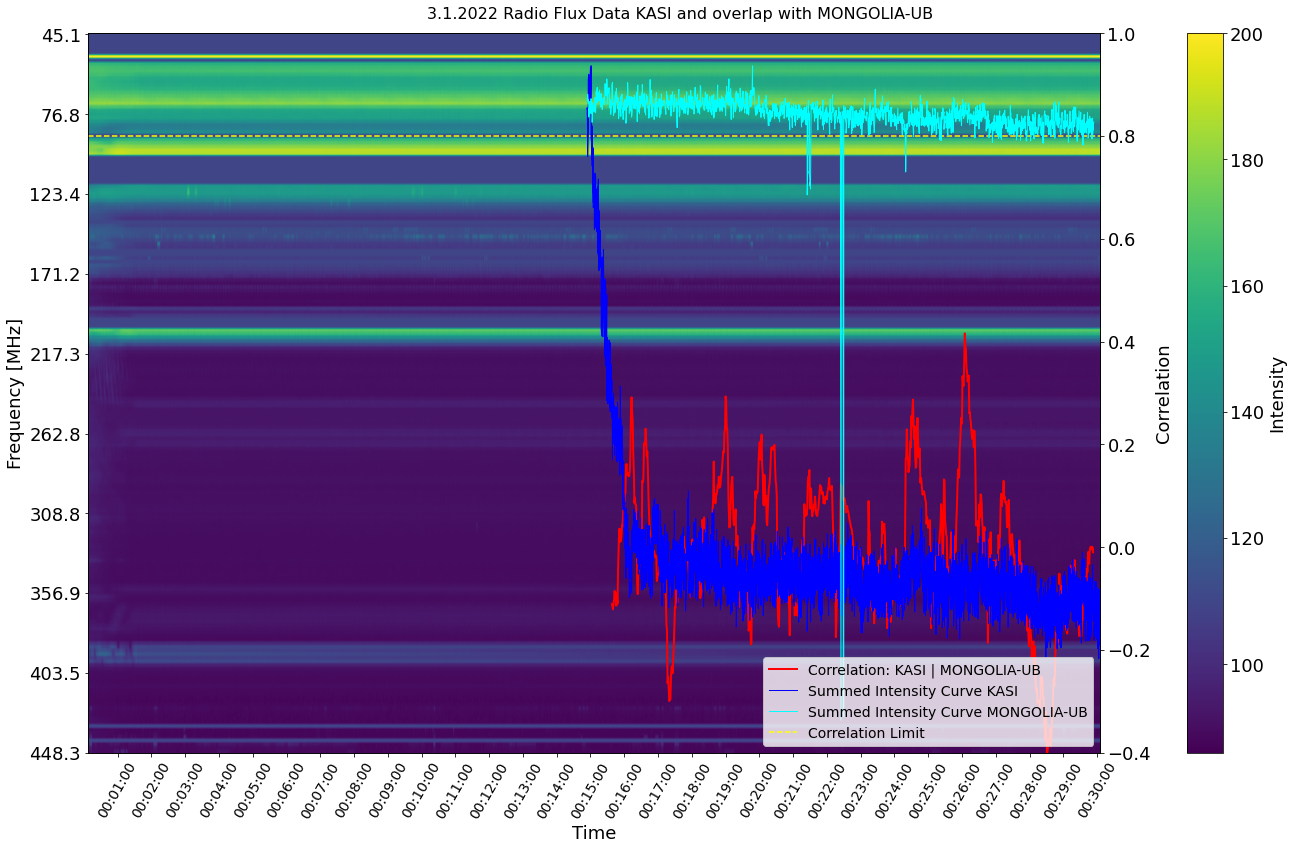

In [8]:
dp1, dp2, cor = analysis.calcPoint(2022,1,3,0,16,1, obs1="KASI",obs2="MONGOLIA-UB", mask_frq=True)
print("done")
analysis.plotEverything(dp1,dp2,cor)